# Rb87 Polarizability Calcs

In [8]:
#### libraries
from numpy import *
import matplotlib.pyplot as plt
from arc import *
from sympy.physics.wigner import wigner_6j,wigner_3j,clebsch_gordan

#### local files
from physconsts import *
from rbconsts import *
from amophys import * # polarizability functions live here
from simfuncs import *

#### other
mpl.rcParams.update(mpl.rcParamsDefault)

## Dynamic polarizabilities for hyperfine states

#### Definitions

Below, the labels $F,F'$ refer to hyperfine levels $|n,L,J,F\rangle,|n',L',J',F'\rangle$, where the quantum numbers $I,S$ are the same between the two states and hence have been suppressed. Therefore the sums over F' are sums over such levels, rather than over just the quantum number F. 

The AC Stark shift on a level F is:

$U_{AC}(\omega) = -\alpha_F(\omega)\frac{|E|^2}{4}$

The total hyperfine polarizability, using scalar (S), vector (V), and tensor (T) polarizabilities which are decoupled from the projection $m_F$, is given by:

$\alpha_{F,m_F}(\omega) = \alpha_F^{(S)}(\omega) + \hat{k}\cdot\hat{B}A\frac{A m_F}{2F}\alpha_F^{(V)}(\omega) + \left(3|\hat{\eta}\cdot \hat{B}|^2-1\right)\frac{3m_F^2-F(F+1)}{2F(2F-1)}\alpha_F^{(T)}(\omega)$

where $\hat{B}$ is the quantization axis unit vector, $\hat{\eta}$ is the laser polarization unit vector, $A=0,\pm1$ corresponds to linear and right/left-handed light polarization, and the $m_F$-independent polarizabilities are

$\alpha_F^{(S)} = \sum_{F'}\frac{2\omega_{F,F'}|\langle F || \hat{d} || F'\rangle|^2}{3\hbar(\omega_{F',F}^2-\omega^2)}$

$\alpha_F^{(V)} = \sum_{F'}(-1)^{F+F'+1}\sqrt{\frac{6F(2F+1)}{F+1}}S_{F,F,F'}^{1,1,1}\frac{\omega_{F,F'}|\langle F || \hat{d} || F'\rangle|^2}{\hbar(\omega_{F',F}^2-\omega^2)}$

$\alpha_F^{(T)} = \sum_{F'}(-1)^{F+F'}\sqrt{\frac{40F(2F+1)(2F-1)}{3(F+1)(2F+3)}}S_{F,F,F'}^{1,1,2}\frac{\omega_{F,F'}|\langle F || \hat{d} || F'\rangle|^2}{\hbar(\omega_{F',F}^2-\omega^2)}$

Hyperfine reduced matrix element expressed in the fine-structure basis:

$\langle F || \hat{d} || F'\rangle = (-1)^{1+I+J+F'}\sqrt{(2F'+1)(2F+1)}S_{F1J}^{J'IF'}\langle J || \hat{d} || J'\rangle$

Depending on the convention used to evaluate the fine structure matrix element, it may need to be divided by $\sqrt{2J+1}$ to yield the correct result.  

#### Rules to remember:
Scalar shift: no dependence on light polarization <br/>
Vector shift: zero for linear light or $j_a=0$ <br/>
Tensor shift: non-zero for $j_a\geq1$ <br/>

## Tests
summarized from test notebook

In [2]:
# definitions from Peters paper
rb = Rubidium87()

w01 = 2*pi*(hf_states[5][1][3/2][0] - hf_states[5][0][1/2][1])*1e9
w11 = 2*pi*(hf_states[5][1][3/2][1] - hf_states[5][0][1/2][1])*1e9
w21 = 2*pi*(hf_states[5][1][3/2][2] - hf_states[5][0][1/2][1])*1e9
w12 = 2*pi*(hf_states[5][1][3/2][1] - hf_states[5][0][1/2][2])*1e9
w22 = 2*pi*(hf_states[5][1][3/2][2] - hf_states[5][0][1/2][2])*1e9
w32 = 2*pi*(hf_states[5][1][3/2][3] - hf_states[5][0][1/2][2])*1e9

# analytical expression for alphaS for the 5S1/2,F=1 levels
aS1 = lambda w: (2*1+1)*(w01/(9*(w01**2-w**2)) + 5*w11/(18*(w01**2-w**2)) +
                 + 5*w21/(18*(w21**2-w**2)))* \
                (rb.getReducedMatrixElementJ(5, 0, .5, 5, 1, 1.5)*ee*a0)**2/(2*pi*hbar)

aS1(w12 - 2*pi*7e8 + 2*pi*6.834*1e9)/(2*pi*hbar*1e3*1e-4)

13.070748659091166

In [3]:
## scalar polarizability test
# agrees with Peters paper to within about a percent. Compare with Table 1 values. 

# the hf state of interest
n = 5
j = 1/2 
l = 0
f = 2
mf = 0
q = 1
nmin = 5
nmax = 8 # exclusive max
nlist = range(nmin,nmax)

delta = 7e8
omega = w12 - 2*pi*delta # omega_1 in Peters paper
# omega += 2*pi*6.834*1e9 # omega_2 " " "

alpha0 = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
print(f"n={n}, l={l}, j={j}, f={f}, mf={mf}")
print("alpha0 ", alpha0/(2*pi*hbar*1e3*1e-4),"[h*kHz*cm^2/V^2]")

n=5, l=0, j=0.5, f=2, mf=0
alpha0  9.545283689886459 [h*kHz*cm^2/V^2]


In [4]:
## vector polarizability test
# agrees with Peters paper to within about a percent. Compare with Table 1 values. 

# the hf state of interest
n = 5
j = 1/2
l = 0
f = 2
mf = 0
q = 1
nmin = 5
nmax = 8 # exclusive max
nlist = range(nmin,nmax)

delta = 7e8
omega = w12 - 2*pi*delta # omega_1 in Peters paper
omega += 2*pi*6.834*1e9 # omega_2 " " "

alpha1 = alpha1_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
print(f"n={n}, l={l}, j={j}, f={f}, mf={mf}")
print("alpha1 ", alpha1/(2*pi*hbar*1e3*1e-4),"[h*kHz*cm^2/V^2]")

n=5, l=0, j=0.5, f=2, mf=0
alpha1  -0.8651136938801328 [h*kHz*cm^2/V^2]


In [5]:
## tensor polarizability test
# agrees with Peters paper to within about a percent. Compare with Table 1 values. 

# the hf state of interest
n = 5
j = 1/2 
l = 0
f = 2
mf = 0
q = 1
nmin = 5
nmax = 8 # exclusive max
nlist = range(nmin,nmax)

delta = 7e8
omega = w12 - 2*pi*delta # omega_1 in Peters paper
omega += 2*pi*6.834*1e9 # omega_2 " " "

alpha2 = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
print(f"n={n}, l={l}, j={j}, f={f}, mf={mf}")
print("alpha2 ", alpha2/(2*pi*hbar*1e3*1e-4),"[h*kHz*cm^2/V^2]")

n=5, l=0, j=0.5, f=2, mf=0
alpha2  0.013052983248486926 [h*kHz*cm^2/V^2]


## misc

In [6]:
# atom
rb = Rubidium87()

In [7]:
omega = 2*pi*c/(7.7e-7)

print("  5S1/2,f=2,mf=0:")
nlist = range(5,12)
n=5; l=0; j=1/2; f=2; mf=0;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)}")
# vector is zero for mf=0
# tensor is zero for j<1

print("  5P3/2,f=3,mf=1:")
n=5; l=1; j=3/2; f=3; mf=1; A = 1;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)}")
print(f"    vector = {A*mf*alpha1_hf([n,l,j,f], omega, nlist, atom=rb, I=I)/(2*f)}")
print(f"    tensor = {-1*((3*mf**2 - f*(f+1))/(2*f*(2*f-1)))*alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)}")

  5S1/2,f=2,mf=0:
    scalar = -1.5049158285936265e-37
  5P3/2,f=3,mf=1:
    scalar = -8.01085604242002e-38
    vector = 1.3424726092880113e-38
    tensor = 1.9284147651828397e-38


In [34]:
## polarizability plot

nlist = range(5,50)
omega_list = [2*pi*c/(l*1e-9) for l in linspace(400,1000,400)]

# 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a05Spts = [alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list]

(-300, 300)

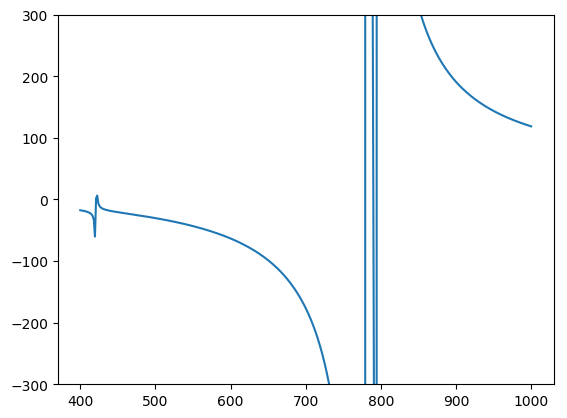

In [40]:
fig, ax = plt.subplots()
lambda_arr = array([2*pi*c/omega for omega in omega_list])
ax.plot(lambda_arr/1e-9,array(a05Spts)/(4*pi*e0*1e-30))
ax.set_ylim((-300,300))
ax.set_ylabel("alpha0 5S1/2 [Angstrom^3]")
ax.set_xlabel("lambda [nm]")

In [50]:
## polarizability plot

nlist = range(5,50)
omega_list = [2*pi*c/(l*1e-9) for l in linspace(400,500,200)]

# 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a05Spts = [alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list]

(-200, 200)

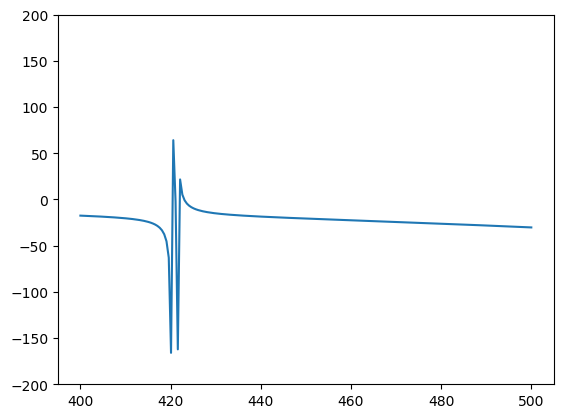

In [51]:
fig, ax = plt.subplots()
lambda_arr = array([2*pi*c/omega for omega in omega_list])
ax.plot(lambda_arr/1e-9,array(a05Spts)/(4*pi*e0*1e-30))
ax.set_ylim((-200,200))

In [52]:
## polarizability plot

nlist = range(5,50)
omega_list = [2*pi*c/(l*1e-9) for l in linspace(750,850,200)]

# 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a05Spts = [alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list]

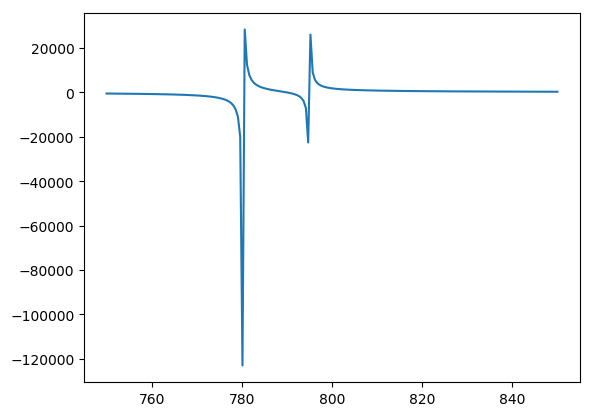

In [54]:
fig, ax = plt.subplots()
lambda_arr = array([2*pi*c/omega for omega in omega_list])
ax.plot(lambda_arr/1e-9,array(a05Spts)/(4*pi*e0*1e-30))
# ax.set_ylim((-300,300))

array([-1352.54510175055, -1394.99347242380, -1440.30536923955,
       -1488.78996691333, -1540.80321678318, -1596.75708959052,
       -1657.13110473201, -1722.48683479520, -1793.48632208284,
       -1870.91569682101, -1955.71579680180, -2049.02233701692,
       -2152.21929639377, -2267.01089167977, -2395.52015598890,
       -2540.42635184155, -2705.16032567113, -2894.18846752716,
       -3113.43600355822, -3370.93649767044, -3677.86240149982,
       -4050.22575038665, -4511.81924751729, -5099.59927493708,
       -5874.25619564544, -6942.91970229946, -8514.09847243919,
       -11054.7921282111, -15871.0306318539, -28528.8885802444,
       -152985.149518854, 44245.2720446802, 19071.7573465629,
       12041.9650567001, 8731.68333638013, 6803.03881742519,
       5537.79276685423, 4641.80746959499, 3972.26333151124,
       3451.42100179564, 3033.32356071316, 2689.04191493148,
       2399.43848659753, 2151.32899973335, 1935.31520399731,
       1744.49658573551, 1573.67070819506, 1418.817918

In [ ]:
omega_list = [2*pi*c/l for l in ]

## Polarizabilities for Rydberg addressing

In [5]:
# atom
rb = Rubidium87()

# lasers
omega780A = 2*pi*(hf_states[5][1][3/2][3] - hf_states[5][0][1/2][2] - 2.1)*1e9
omega780B = 2*pi*(hf_states[5][1][3/2][3] - hf_states[5][0][1/2][2] - 2.1 + 6.834682)*1e9
omega480 = 2*pi*(eVToGHz(rb.getEnergy(84,2,5/2) - rb.getEnergy(5,1,3/2)) - .266651 + 2.1)*1e9

In [57]:
print("Laser frequencies")
print(f" 780A: 2*pi*{omega780A/(2*pi)}")
print(f" 780B: 2*pi*{omega780B/(2*pi)}")
print(f" 480: 2*pi*{omega480/(2*pi)}")

print("780A polarizabilities")

nlist = range(5,8)

print("  5S1/2,f=2,mf=0:")
n=5; l=0; j=1/2; f=2; mf=0;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega780A, nlist, atom=rb, I=I)}")
# vector is zero for mf=0
# tensor is zero for j<1

print("  5P3/2,f=3,mf=1:")
n=5; l=1; j=3/2; f=3; mf=1; A = 1;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega780A, nlist, atom=rb, I=I)}")
print(f"    vector = {A*mf*alpha1_hf([n,l,j,f], omega780A, nlist, atom=rb, I=I)/(2*f)}")
print(f"    tensor = {-1*((3*mf**2 - f*(f+1))/(2*f*(2*f-1)))*alpha2_hf([n,l,j,f], omega780A, nlist, atom=rb, I=I)}")

print("480 polarizabilities")

print("  5S1/2,f=2,mf=0:")
n=5; l=0; j=1/2; f=2; mf=0;
nmax = 100; nmin = 5;
nlist = [int(x) for x in linspace(nmax,nmin,nmax-nmin+1)]
print(f"    scalar = {alpha0_hf([n,l,j,f], omega480, nlist, atom=rb, I=I)}")
# vector is zero for mf=0
# tensor is zero for j<1

print("  5P3/2,f=3,mf=1:")
n=5; l=1; j=3/2; f=3; mf=1; A = 1;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega480, nlist, atom=rb, I=I)}")
print(f"    vector = {-A*mf*alpha1_hf([n,l,j,f], omega480, nlist, atom=rb, I=I)/(2*f)}") # overall minus sign because dot(k,B_bias)=
print(f"    tensor = {-1*((3*mf**2 - f*(f+1))/(2*f*(2*f-1)))*alpha2_hf([n,l,j,f], omega480, nlist, atom=rb, I=I)}")

Laser frequencies
 780A: 2*pi*384226015203379.4
 780B: 2*pi*384232849885379.44
 480: 2*pi*625314831618150.4
780A polarizabilities
  5S1/2,f=2,mf=0:
    scalar = 3.20346392953120E-34
  5P3/2,f=3,mf=1:
    scalar = 1.52739309640219E-34
    vector = -3.817491143122172e-35
    tensor = -4.581457685120631e-35
480 polarizabilities
  5S1/2,f=2,mf=0:
    scalar = -2.90311524481040E-39
  5P3/2,f=3,mf=1:
    scalar = -4.82150951678205E-39
    vector = 1.696626924053701e-40
    tensor = 4.557481703934684e-40


In [54]:
alpha780excited = scalar = 1.52739309640219E-34 + -3.817491143122172e-35 + -4.581457685120631e-35
alpha780excited

6.874982135779098e-35

In [60]:
alpha480excited = 3.53496801131378E-39 + 4.27727148997324e-40 + -7.310403832277205e-40
alpha480excited

3.231654777083384e-39

In [6]:
## ponderomotive shifts, S.I. units

alphaPond = lambda omega: -ee**2/(me*omega**2)

In [7]:
alphaPond(omega780A)

-4.8350228219114005e-39

In [8]:
alphaPond(omega480)

-1.825469589864302e-39

## Ramsey frequency
Clock state Ramsey experiment with 780A on in gap time gives a fringe frequency equal to the differential AC Stark shift from the 780A plus the differential Zeeman shift. The latter is 4 kHz at 3 G. This can be used to determine the electric field that the atom sees. We can also estimate the Rabi frequency directly.

In [10]:
rb = Rubidium87()

# lasers
omega780A = 2*pi*(hf_states[5][1][3/2][3] - hf_states[5][0][1/2][2] - 2.1)*1e9

# clock states differential AC stark shift = ramsey frequency - Zeeman shift
dU_ac = 2*pi*hbar*(1.34e6 - 4e3)

nlist = range(5,8)
efield = 2*sqrt(dU_ac/(alpha0_hf([5,0,1/2,2],omega780A,nlist,atom=rb,I=I)-alpha0_hf([5,0,1/2,1],omega780A,nlist,atom=rb,I=I)))
efield

3797.8949279380545

In [12]:
2*pi*c/omega780A

7.80250285346538e-07

In [13]:
2*pi*c/omega480

4.794264310414898e-07

In [22]:
2*pi*(hf_states[5][1][3/2][3] - hf_states[5][0][1/2][2])*1e9

2414176448051179.0

In [23]:
2*pi*(eVToGHz(rb.getEnergy(84,2,5/2) - rb.getEnergy(5,1,3/2)) - .266651)*1e9

3928955767695494.5